In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import engl_ish

In [29]:
model = engl_ish.load_model('english_4_newspaper_24647.pickle')

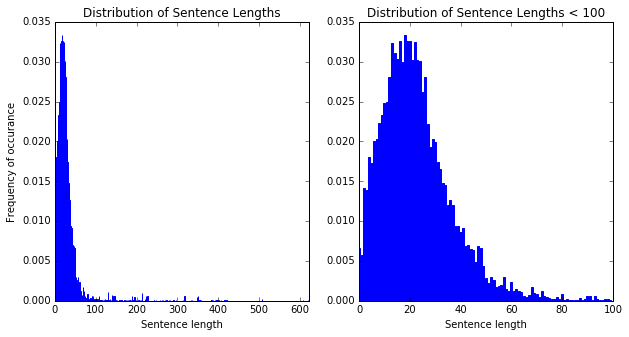

In [30]:
x,y = model.sent_lens.unzip_norm()

x2,y2 = x[0:100],y[0:100]

width = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.bar(np.array(x)-width/2., y, edgecolor = 'b')
ax1.set_ylabel('Frequency of occurance')
ax1.set_xlabel('Sentence length')
ax1.set_title('Distribution of Sentence Lengths')
ax1.set_xlim([0,max(x)+1])

ax2.bar(np.array(x2)-width/2., y2,edgecolor = 'b')
ax2.set_xlim([0,max(x2)+1])
ax2.set_xlabel('Sentence length')
ax2.set_title('Distribution of Sentence Lengths < 100')

plt.show()

f.savefig('figs\sentence_lengths.png')

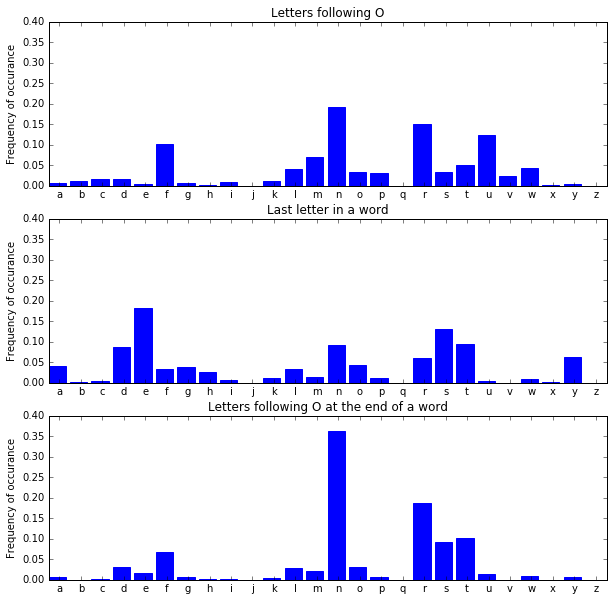

In [34]:
letter = 'o'
#for letter in 'abcdefghijklnopqrstuvwxyz':
x,y = model.markov_models[0].model[letter].unzip_norm()
model.lasts[0].normalize()
x2,y2 = model.lasts[0].unzip_norm()

modded = engl_ish.modulate_dist(model.markov_models[0].model[letter], model.lasts[0])
modded.normalize()
x3,y3 = modded.unzip_norm()

f, (ax1,ax2, ax3) = plt.subplots(3,1,figsize=(10,10),sharey = True)

inds = np.arange(len(y))
inds2 = np.arange(len(y2))
inds3 = np.arange(len(y3))

ax1.bar(inds-width/2., y, edgecolor = 'b')
ax1.set_ylabel('Frequency of occurance')
ax1.set_xticks(inds)
ax1.set_xticklabels(x)
ax1.set_xlim([-0.5,25.5])
ax1.set_title('Letters following '+letter.upper())

ax2.bar(inds2-width/2., y2, edgecolor = 'b')
ax2.set_ylabel('Frequency of occurance')
ax2.set_xticks(inds2)
ax2.set_xticklabels(x2)
ax2.set_xlim([-0.5,25.5])
ax2.set_title('Last letter in a word')

ax3.bar(inds3-width/2., y3, edgecolor = 'b')
ax3.set_ylabel('Frequency of occurance')
ax3.set_xticks(inds3)
ax3.set_xticklabels(x3)
ax3.set_xlim([-0.5,25.5])
ax3.set_title('Letters following '+letter.upper()+' at the end of a word')

plt.show()

f.savefig('figs\last_letters_'+letter.upper()+'.png')

#    plt.clf()



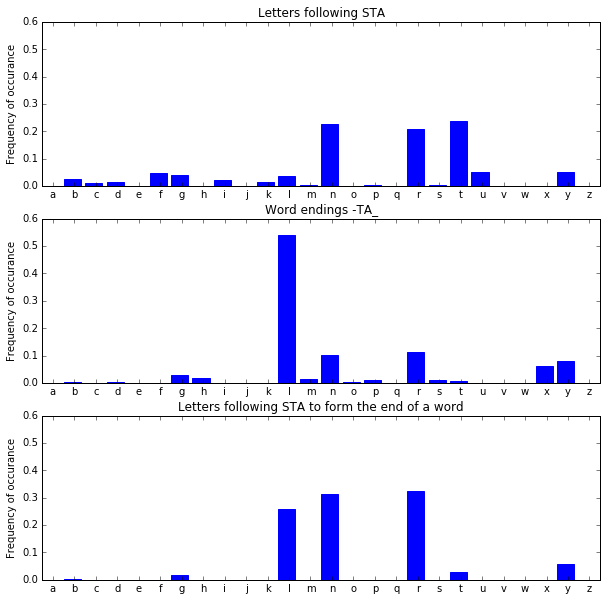

In [79]:
letter = model.firsts[2].draw()
x,y = model.markov_models[2].model[letter].unzip_norm()

model.lasts[2].normalize()
ending = model.lasts[2].state_to_dist(letter[-2:])

for l in 'abcdefghijklmnopqrstuvwxyz':
    ending.increment(l,0)

x2,y2 = ending.unzip_norm()

modded = engl_ish.modulate_dist(model.markov_models[2].model[letter], ending)
modded.normalize()
x3,y3 = modded.unzip_norm()

f, (ax1,ax2, ax3) = plt.subplots(3,1,figsize=(10,10),sharey = True)

inds = np.arange(len(y))
inds2 = np.arange(len(y2))
inds3 = np.arange(len(y3))

ax1.bar(inds-width/2., y, edgecolor = 'b')
ax1.set_ylabel('Frequency of occurance')
ax1.set_xticks(inds)
ax1.set_xticklabels(x)
ax1.set_xlim([-0.5,25.5])
ax1.set_title('Letters following '+letter.upper())

ax2.bar(inds2-width/2., y2, edgecolor = 'b')
ax2.set_ylabel('Frequency of occurance')
ax2.set_xticks(inds2)
ax2.set_xticklabels(x2)
ax2.set_xlim([-0.5,25.5])
ax2.set_title('Word endings -'+letter[-2:].upper()+'_')

ax3.bar(inds3-width/2., y3, edgecolor = 'b')
ax3.set_ylabel('Frequency of occurance')
ax3.set_xticks(inds3)
ax3.set_xticklabels(x3)
ax3.set_xlim([-0.5,25.5])
ax3.set_title('Letters following '+letter.upper()+' to form the end of a word')

plt.show()

f.savefig('figs\last_3_letters_'+letter.upper()+'.png')

#    plt.clf()

